<a href="https://colab.research.google.com/github/sarthakv18/EMG-Controlled-Shooting-Game/blob/main/EMG_Signal_Assignment_02_Sarthak_Verma_230931.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMG Signal Processing Assignment

## Setup
    Import necessary libraries: numpy, scipy, matplotlib.

## Part 1: Signal Filtering

    Task: Implement a Butterworth filter to remove high-frequency noise from the EMG signal.
    Task: Compare the frequency response of the original and filtered signals using a frequency plot.

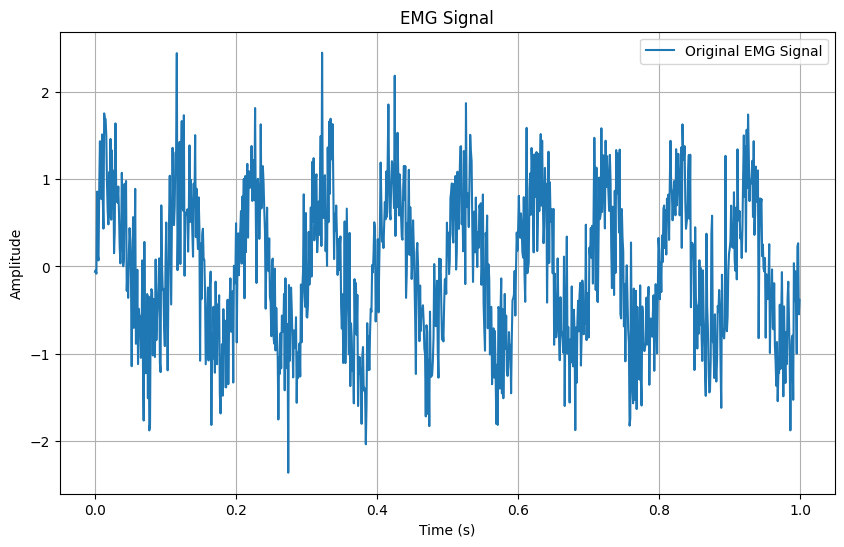

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate example EMG signal with noise
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second)
emg_signal = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(len(t))

# Plot original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='Original EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
#Implement Butterworth filter or any other best suited filter.
import plotly.graph_objects as go

def butter_lowpass_filter(data, cutoff, fs, order):
    nyq=0.5*fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter the data, and plot both the original and filtered signals.
cutoff = 16
order = 2
# fs=0.5

y = butter_lowpass_filter(emg_signal, cutoff, fs, order)

In [3]:
#Compare the frequency response of the original and filtered signals using a frequency plot.
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = emg_signal,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

## Part 2: Peak Detection

    Task: Utilize scipy.signal.find_peaks to detect peaks in the filtered EMG signal.
    Question: What parameters can be adjusted in find_peaks function to improve peak detection accuracy?
    Task: Plot the original signal with markers indicating the detected peaks.

In [4]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(y)


Answer the Question here:  we can adjust the threshold and the distance parameter

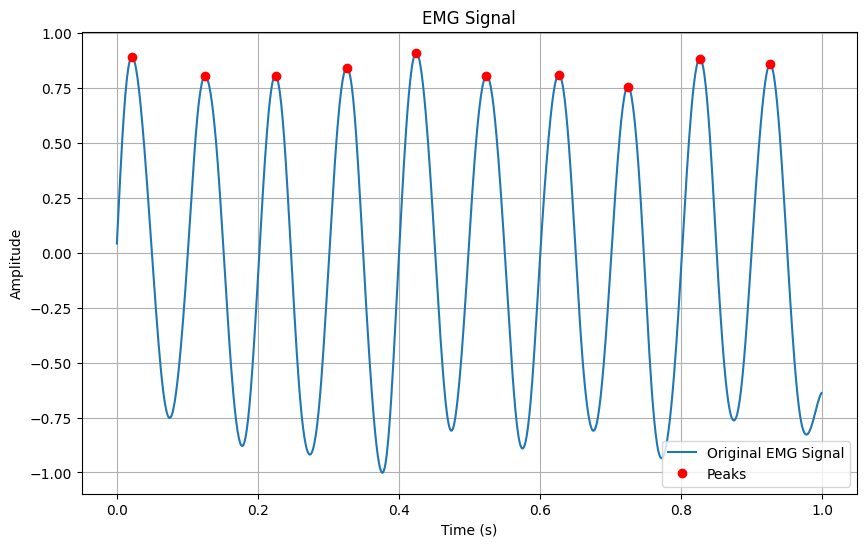

In [5]:
#
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Original EMG Signal')

plt.plot(t[peaks], y[peaks], 'ro', label='Peaks')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid(True)
plt.show()

## Part 3: Peak Start and End Time Detection

    Task: Develop a method to determine the start and end times of each detected peak.
    Question: Why is it necessary to identify the precise onset and offset times of muscle activation in EMG signals?
    Task: Visualize the original signal with annotated start and end times of peaks.

In [6]:
threshold = 0.4

cstarts = []
for i in range(1, len(y)):
    if y[i-1] < threshold and y[i] >= threshold:
        cstarts.append(i)

print(cstarts)

cstops = []
for i in range(1, len(y)):
    if y[i-1] >= threshold and y[i] < threshold:
        cstops.append(i)

print(cstops)

starts=[]
for n in range(0, len(cstarts)):
    starttime = cstarts[n]/1000
    starts.append(starttime)

print(starts)

stops=[]
for n in range(0, len(cstops)):
    stoptime = cstops[n]/1000
    stops.append(stoptime)

print(stops)

[6, 109, 210, 309, 407, 507, 609, 710, 809, 909]
[41, 144, 240, 342, 444, 542, 643, 740, 844, 943]
[0.006, 0.109, 0.21, 0.309, 0.407, 0.507, 0.609, 0.71, 0.809, 0.909]
[0.041, 0.144, 0.24, 0.342, 0.444, 0.542, 0.643, 0.74, 0.844, 0.943]


Answer the Question here:  to identify when the activaton of muscle start and end, so that we can capture the movement of the muscle precisely

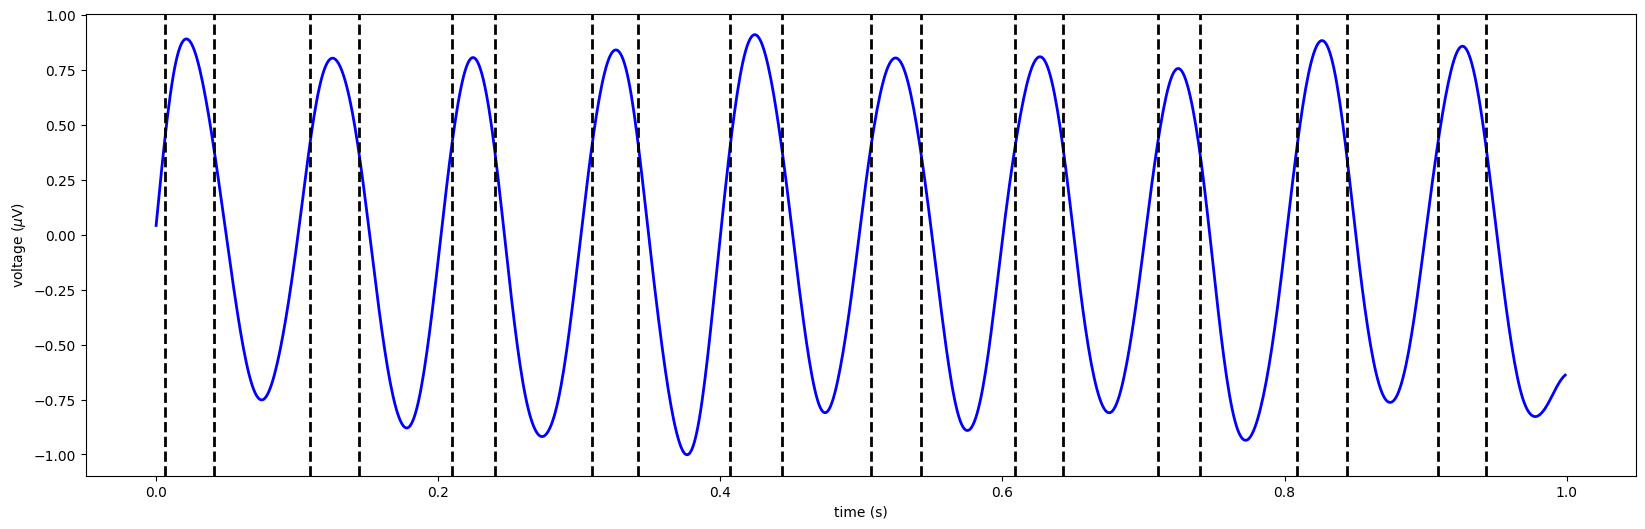

In [7]:
## plot envelope with contraction start and stop times marked by dashed lines
plt.figure(figsize=(20,6))
plt.xlabel('time (s)')
plt.ylabel('voltage ($\mu$V)')
plt.plot(t, y, 'b', linewidth=2.0)
for n in range(0, len(starts)):
    plt.axvline(x=starts[n], color='k',linewidth=2.0, linestyle='--')
for n in range(0, len(stops)):
    plt.axvline(x=stops[n], color='k',linewidth=2.0, linestyle='--')
# plt.xlim(0, max(xx['timeEMG']));

## Part 4: Envelope Extraction

    Task: Implement the Hilbert transform to extract the envelope of the filtered EMG signal.
    Question: What information does the envelope of an EMG signal provide about muscle activity?
    Task: Plot the original signal overlaid with its envelope.

In [21]:
from scipy.signal import hilbert

analytic_signal = hilbert(y)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))


Answer the Question here:  it gives us info about the  movement of the muscle the intensity and for what time there was activity in  the muscle

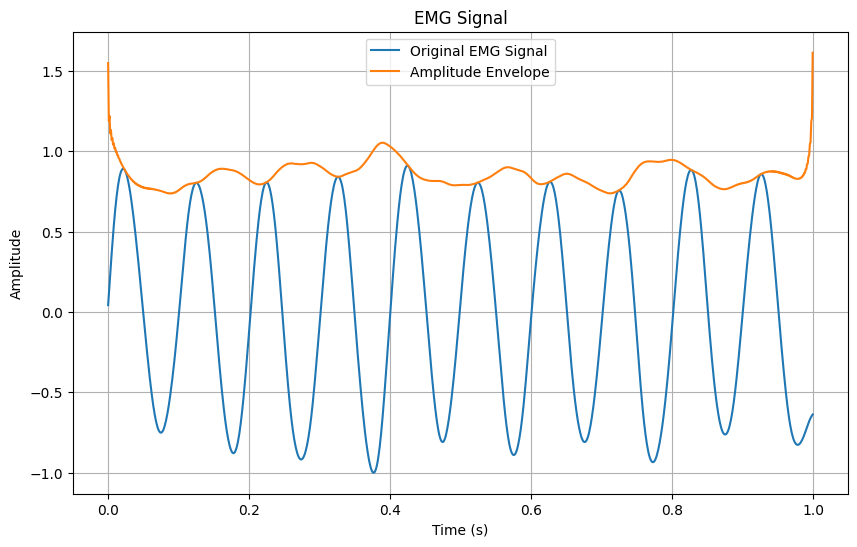

In [22]:
#
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Original EMG Signal')

plt.plot(t, amplitude_envelope, label='Amplitude Envelope')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid(True)
plt.show()


## Part 5: Time Domain Analysis

    Task: Calculate key metrics such as mean, variance, and RMS (Root Mean Square) of the cleaned EMG signal.
    Task: Interpret the calculated metrics in the context of muscle activity and signal characteristics.

In [11]:
# Calculate key metrics.
# Calculate mean and variance

mean = np.mean(y)
variance = np.var(y)

print("Mean:", mean)
print("Variance:", variance)

# Calculate RMS
rms = np.sqrt(np.mean(y**2))

print("RMS:", rms)

Mean: -0.021503234815890775
Variance: 0.369246348206104
RMS: 0.6080367894409444


Interpretation:
- Mean: A higher mean value may suggest increased muscle activation, while a lower mean value may indicate reduced muscle activity.
- Variance: Higher variance may indicate greater variability in muscle activation, possibly due to changes in force production or signal noise.
- RMS: A higher RMS value corresponds to stronger muscle contractions, while a lower RMS value suggests weaker muscle activity.
These interpretations can provide insights into muscle performance, fatigue, and overall neuromuscular function.

## Part 6: Frequency Domain Analysis

    Task: Apply the Fast Fourier Transform (FFT) to analyze the frequency components of the cleaned EMG signal.
    Task: Plot the frequency spectrum of the EMG signal and identify prominent frequency peaks.

In [12]:
N = len(y)  # Length of the signal
freq = np.fft.rfftfreq(N, d=1/fs)  # Frequency bins for the FFT
fft_result = np.abs(np.fft.rfft(y))  # Magnitude of the FFT

# # Plot the original signal
# plt.figure(figsize=(10, 6))
# plt.subplot(2, 1, 1)
# plt.plot(t, y)
# plt.title('Original Signal')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')


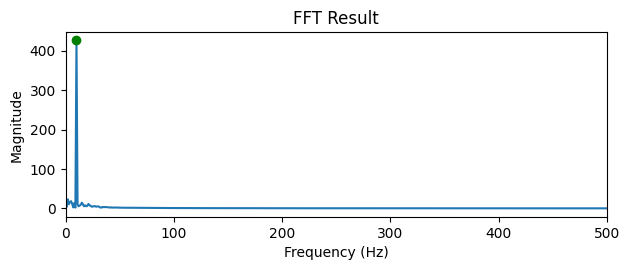

In [14]:
peaks, _ = find_peaks(fft_result,threshold=50)

# Plot the FFT result
plt.subplot(2, 1, 2)
plt.plot(freq, fft_result)

plt.plot(freq[peaks], fft_result[peaks], 'go', label='Peaks')

plt.title('FFT Result')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)  # Display only positive frequencies
plt.tight_layout()
plt.show()